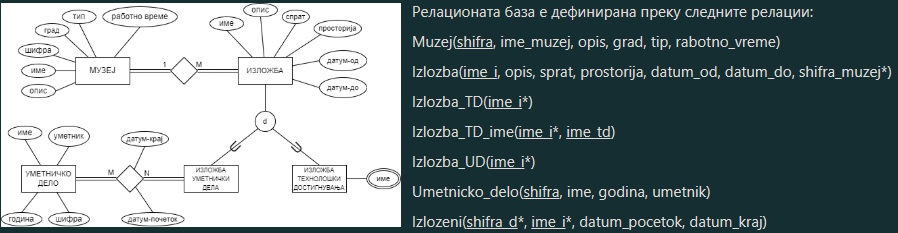

**2\. Да се напише DML израз со кој ќе се вратат имињата на уметничките дела заедно со нивните креатори (уметници) кои биле изложени на барем една изложба во целото времетраење на истата подредени според името на уметничкото дело.**

In [ ]:
with
Izlozba_dela as
(
    select ime, umetnik
    from Izlozeni join Umetnicko_delo on Izlozeni.shifra_d = Umetnicko_delo.shifra join Izlozba on Izlozeni.ime_i = Izlozba.ime_i
    where Izlozeni.datum_pocetok = Izlozba.datum_od and Izlozeni.datum_kraj = Izlozba.datum_do
)

select * from Izlozba_dela

**3. Да се напише DML израз со кој ќе се вратат сите уметници кои немале ниту едно уметничко дело изложено во музеј на затворено подредени според името на уметникот.**

In [ ]:
with 
Umetnici as
(
    select Umetnicko_delo.umetnik
    from Umetnicko_delo 
    join Izlozeni on Umetnicko_delo.shifra = Izlozeni.shifra_d 
    join Izlozba on Izlozeni.ime_i = Izlozba.ime_i 
    join Muzej on Muzej.shifra = Izlozba.shifra_muzej
    where Muzej.tip = 'zatvoreno'
)

select umetnik from Umetnicko_delo
except
select * from Umetnici  

**4. Да се напише DML израз со кој ќе се врати името на музејот кој имал најмногу изложени различни уметнички дела во 2023 година (уметничките дела кај кои почетниот датум на изложување на некоја изложба на уметнички дела е во 2023 година).**

In [ ]:
with
Dela2023 as
(
    select ime_muzej, count(ime_muzej) as broj
    from Izlozeni join Izlozba on Izlozeni.ime_i = Izlozba.ime_i join Muzej on Izlozba.shifra_muzej = Muzej.shifra
    where datum_od like '2023%' or datum_do like '2023%'
    group by Muzej.shifra
),
MaxDela as
(
    select ime_muzej, max(broj) 
    from Dela2023 
)

select ime_muzej from MaxDela

За секое уметничко дело се чуваат изведените атрибути „br\_izlozbi\_otvoreno“ и „br\_izlozbi\_zatvoreno“ кои го означуваат бројот на изложби одржани во музеи на отворено и бројот на изложби одржани во музеи на затворено на кои било изложено делото. 

**5\. Да се напише/ат соодветниот/те тригер/и за одржување на конзистентноста на атрибутите „br\_izlozbi\_otvoreno“ и „br\_izlozbi\_zatvoreno“ при додавање на записите од кои зависи нивната вредност.**

In [ ]:
create trigger izlozbi
    after insert
    on Izlozeni
    for each row
begin
    update Umetnicko_delo
    set
    br_izlozbi_otvoreno = (
        select count(shifra_d)
        from Izlozeni join Izlozba on Izlozeni.ime_i = Izlozba.ime_i join Muzej on Izlozba.shifra_muzej = Muzej.shifra
        where tip = 'otvoreno' and Izlozeni.shifra_d = new.shifra_d
        ),
    br_izlozbi_zatvoreno = (
        select count(shifra_d)
        from Izlozeni join Izlozba on Izlozeni.ime_i = Izlozba.ime_i join Muzej on Izlozba.shifra_muzej = Muzej.shifra
        where tip = 'zatvoreno' and Izlozeni.shifra_d = new.shifra_d
        )
    where shifra = new.shifra_d;
end;